# Image Classification by MLP - Fashion MNIST

In this exercise, we will try to use a neural network on a simple classification task: classifying images of clothes into 10 classes.

We will first download the data:

In [18]:
from tensorflow.keras.datasets import fashion_mnist

#TODO: load dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

#TODO: Resample the dataset if needed
# X_train = X_train[:x]
# y_train = y_train[:x]
# X_test = X_test[:y]
# y_test = y_test[:y]

X_train.shape

(60000, 28, 28)

This dataset contains 10 classes:
* 0:	T-shirt/top
* 1:	Trouser
* 2:	Pullover
* 3:	Dress
* 4:	Coat
* 5:	Sandal
* 6:	Shirt
* 7:	Sneaker
* 8:	Bag
* 9:	Ankle boot

Now begin by exploring the data. Try to display some images with the associated label.

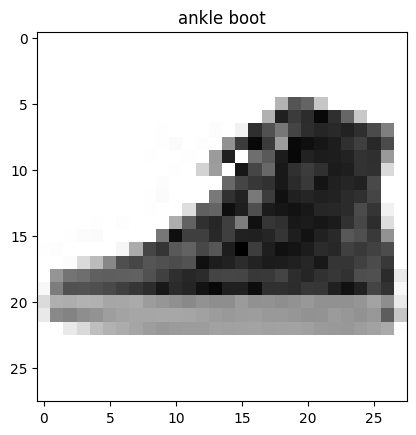

In [19]:
# TODO: Explore the data, display some input images
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

label_class = ['top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

idx = np.random.randint(X_train.shape[0])

plt.imshow(X_train[idx], cmap='gray_r')
plt.title(label_class[y_train[idx]])
plt.show()

**Before going further**: what methods could you use to perform such a classification task?
- Neural Networks
- PCA with classification model

---

The first method you will try is using neural networks. First step is the data preparation: data rescaling, label preparation.

Hint: you can use the Keras function `to_categorical`

In [20]:
# TODO: Make the data preparation
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

X_train_norm = X_train / 255.0
X_test_norm = X_test / 255.0

# TODO: reshape the image data (2D array) into input 1D array for a neural network
X_train_norm = X_train_norm.reshape(X_train_norm.shape[0], np.prod(X_train_norm.shape[1:]))
X_test_norm = X_test_norm.reshape(X_test_norm.shape[0], np.prod(X_test_norm.shape[1:]))

Next step: model building with Keras. Build your neural network architecture. At first, I would recommend a light architecture: no more than 2 hidden layers, with about 10 units per layer. Put that model into a function, so that you can reuse it later.

In [21]:
# TODO: Build your model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def my_model(input_dim, activation_fn):
    # Create the Sequential object
    model = Sequential()

    # Add 2 dense layers with 10 neurons each using sigmoid or relu activation
    #Sigmoid activation
    model.add(Dense(10, input_dim=input_dim, activation=activation_fn))
    model.add(Dense(10, activation=activation_fn))

    # Add the output layer with one unit: the predicted result
    model.add(Dense(10, activation='softmax'))
    
    return model

activation_fn = 'sigmoid' #'relu', 'tanh', 'elu', 'linear', 'softplus'
my_model(X_train_norm.shape[1], activation_fn).summary()

c:\Users\61406\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,070 (31.52 KB)

 Trainable params: 8,070 (31.52 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
X_train_norm.shape[1]

784

Now compile and fit your model on your training data. Since this is a multiclass classification, the loss is not `binary_crossentropy` anymore, but `categorical_crossentropy`.

In [23]:
import os

#https://stackoverflow.com/questions/53014306/error-15-initializing-libiomp5-dylib-but-found-libiomp5-dylib-already-initial
# os.environ['KMP_DUPLICATE_LIB_OK']='True' 

# TODO: Compile and fit your model
model = my_model(X_train_norm.shape[1], activation_fn)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train_norm, y_train_cat, epochs=100, batch_size=128)

Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 806us/step - accuracy: 0.3477 - loss: 2.1213
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step - accuracy: 0.6734 - loss: 1.3991
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - accuracy: 0.7479 - loss: 0.9968
Epoch 4/100
382/469 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step - accuracy: 0.7810 - loss: 0.7700

Once your model has been trained, compute the accuracy (and other metrics if you want) on the train and test dataset.

Be careful, Keras returns softmax output (so an array of 10 values between 0 and 1, for which the sum is equal to 1). To compute correctly the accuracy, you have to convert that array into a categorical array with zeros and a 1.

In [ ]:
# TODO: Compute the accuracy of your model
print('accuracy on train with NN: batch size 128 and 100 epochs\n', model.evaluate(X_train_norm, y_train_cat, verbose=0)[1])
print('accuracy on test with NN: batch size 128 and 100 epochs\n', model.evaluate(X_test_norm, y_test_cat, verbose=0)[1])

accuracy on train with NN: batch size 128 and 100 epochs
 0.9069833159446716
accuracy on test with NN: batch size 128 and 100 epochs
 0.8432000279426575


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train_norm, y_train_cat, epochs=200, batch_size=256)

Epoch 1/200
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 973us/step - accuracy: 0.9029 - loss: 0.2746
Epoch 2/200
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - accuracy: 0.9027 - loss: 0.2730
Epoch 3/200
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - accuracy: 0.9028 - loss: 0.2719
Epoch 4/200
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - accuracy: 0.9044 - loss: 0.2712
Epoch 5/200
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9024 - loss: 0.2712
Epoch 6/200
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - accuracy: 0.9041 - loss: 0.2687
Epoch 7/200
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step - accuracy: 0.9040 - loss: 0.2740
Epoch 8/200
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - accuracy: 0.9028 - loss: 0.2708
Epoch 9/200
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - accuracy: 0.9043 - loss: 0.2693
Epoch 10/200
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - accuracy: 0.9023 - loss: 0.2697
Epoch 11/200
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - accuracy: 0.9034 - loss: 0.2699
Epoch 12/200
235/235 

In [ ]:
# TODO: Compute the accuracy of your model
print('accuracy on train with NN: batch size 256 and 200 epochs\n', model.evaluate(X_train_norm, y_train_cat, verbose=0)[1])
print('accuracy on test with NN: batch size 256 and 200 epochs\n', model.evaluate(X_test_norm, y_test_cat, verbose=0)[1])

accuracy on train with NN: batch size 256 and 150 epochs
 0.9069833159446716
accuracy on test with NN: batch size 256 and 150 epochs
 0.8432000279426575


What do you think of those results? Can you improve it by changing the number of layers? Of units per layer? The number of epochs? The activation functions?

You should try!

---

In order to compare your results with more traditional machine learning methods, you will do this work with another method: a PCA followed by a classification model (of your choice). Of course, you can perform hyperparameter optimization using a gridsearch on that model!

Fit your model and display the performances.

In [ ]:
# TODO: Redo the classification with PCA and classification model
from sklearn.decomposition import PCA

pca = PCA(n_components=0.9)

pca.fit(X_train_norm)
X_train_pca = pca.transform(X_train_norm)
X_test_pca = pca.transform(X_test_norm)

In [ ]:
# TODO: use any classifier you want
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train_pca, y_train)

print('score with RF on train', rf.score(X_train_pca, y_train))
print('score with RF on train', rf.score(X_test_pca, y_test))

score with RF on train 1.0
score with RF on train 0.8619


Are the performances different? Can you explain why?

If you still have time, you could try to use scikit-learn's `Pipeline` to perform the hyperparameter optimization jointly on the PCA and the classification model. This might improve your performances.